In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import scipy
from scipy.optimize import least_squares,differential_evolution

from scipy import io
from scipy.stats import t

In [ ]:
iid_last_5= pd.read_csv('iid_last_5_cond.csv', header=None, sep = ";")
iid_last_15 = pd.read_csv('iid_last_15_cond.csv', header=None, sep = ";")

In [ ]:
iid_last_5.iloc[3].tolist()

In [2]:
iid_last_5= pd.read_csv('iid_last_5_cond.csv', header=None, sep = ";",skiprows=4).to_numpy()
iid_last_15 = pd.read_csv('iid_last_15_cond.csv', header=None, sep = ";",skiprows=4).to_numpy()

In [3]:
not_equal_5 = iid_last_5[:,50:]
not_equal_15 = iid_last_15[:,50:]

In [ ]:

# for i in range(not_equal_5.shape[1]): 
#     not_equal_5[1:, i] = np.where(not_equal_5[1:, i] == 0, np.nan, not_equal_5[1:, i])
#     not_equal_15[1:, i] = np.where(not_equal_15[1:, i] == 0, np.nan, not_equal_15[1:, i])

In [ ]:
# visual

In [ ]:
def visual (path_5,path_15,):

    for i in range(path_5.shape[1]):
        fig = plt.figure(figsize=(15, 10))
        plt.subplot(2, 2, 1)
        inv = len(np.where(path_5[1:,i] == 0)[0])
        iid_trajectory = path_5[:-(inv),i]
        mean_iid = round(np.mean(iid_trajectory),3)

        last_5_percent = int(len(iid_trajectory)*0.05)
        last_10_percent = int(len(iid_trajectory)*0.10)
        last_15_percent = int(len(iid_trajectory)*0.15)
        mean_last_5_iid = round(np.mean(iid_trajectory[-last_5_percent:]),3)
        mean_last_10_iid = round(np.mean(iid_trajectory[-last_10_percent:]),3)
        mean_last_15_iid = round(np.mean(iid_trajectory[-last_15_percent:]),3)
        if np.sign(mean_last_5_iid) ==np.sign( mean_iid):
            cond = "EQUAL"
        else: 
            cond='NOT EQUAL'  
        plt.plot(iid_trajectory, range(len(iid_trajectory)), 'o-', )
        plt.plot(iid_trajectory[-1], len(iid_trajectory) - 1, 'o', color='red')
        plt.axvline(x=mean_iid, color='red', linestyle='--', label=f' mu {mean_iid}')
        plt.axvline(x=0, color='gray', linestyle='--',alpha = 0.5)
        plt.axvline(x=mean_last_5_iid, color='green', linestyle='--', 
                    label=f' last 5% :mu  {mean_last_5_iid}, std: {np.std(iid_trajectory[-last_5_percent:]):.3f}')
        plt.axvline(x=mean_last_10_iid, color='blue', linestyle='--', 
                    label=f'last 10%:mu  {mean_last_10_iid}, std: {np.std(iid_trajectory[-last_10_percent:]):.3f}')
        plt.axvline(x=mean_last_15_iid, color='blue', linestyle='--', alpha = 0.01,
                    label=f'last 15%:mu  {mean_last_15_iid}, std: {np.std(iid_trajectory[-last_15_percent:]):.3f}')
        plt.title(f'iid {cond} 5% {i}\n  Last: {iid_trajectory[-1]:.3f}, std: {np.std(iid_trajectory):.3f}')
        plt.xlim(-20, 20)
        plt.ylim(150, -1)
        plt.legend(loc='upper right')

        plt.subplot(2, 2, 2)

        inv = len(np.where(path_15[1:,i] == 0)[0])
        iid_trajectory = path_15[:-(inv),i]
        mean_iid = round(np.mean(iid_trajectory),3)

        last_5_percent = int(len(iid_trajectory)*0.05)
        last_10_percent = int(len(iid_trajectory)*0.10)
        last_15_percent = int(len(iid_trajectory)*0.15)
        mean_last_5_iid = round(np.mean(iid_trajectory[-last_5_percent:]),3)
        mean_last_10_iid = round(np.mean(iid_trajectory[-last_10_percent:]),3)
        mean_last_15_iid = round(np.mean(iid_trajectory[-last_15_percent:]),3)
        if np.sign(mean_last_15_iid) ==np.sign( mean_iid):
            cond = "EQUAL"
        else: 
            cond='NOT EQUAL' 
        plt.plot(iid_trajectory, range(len(iid_trajectory)), 'o-', )
        plt.plot(iid_trajectory[-1], len(iid_trajectory) - 1, 'o', color='red')
        plt.axvline(x=mean_iid, color='red', linestyle='--', label=f' mu {mean_iid}')
        plt.axvline(x=0, color='gray', linestyle='--',alpha = 0.5)
        plt.axvline(x=mean_last_5_iid, color='green', linestyle='--', 
                    label=f' last 5%:mu  {mean_last_5_iid}, std: {np.std(iid_trajectory[-last_5_percent:]):.3f}')
       
        plt.axvline(x=mean_last_15_iid, color='blue', linestyle='--', 
                    label=f'last 15%:mu  {mean_last_15_iid}, std: {np.std(iid_trajectory[-last_15_percent:]):.3f}')
        plt.title(f'iid {cond} 15% {i}\n  Last: {iid_trajectory[-1]:.3f}, std: {np.std(iid_trajectory):.3f}')
        plt.axvline(x=mean_last_10_iid, color='blue', linestyle='--', alpha = 0.01,
                    label=f'last 10%:mu  {mean_last_10_iid}, std: {np.std(iid_trajectory[-last_10_percent:]):.3f}')
        plt.xlim(-20, 20)
        plt.ylim(150, -1)
        plt.legend(loc='upper right')

In [ ]:
visual (not_equal_5,not_equal_15,)

In [ ]:
# for i in range(not_equal_5.shape[1]): 
#     not_equal_5[1:, i] = np.where(not_equal_5[1:, i] == 0, np.nan, not_equal_5[1:, i])
#     not_equal_15[1:, i] = np.where(not_equal_15[1:, i] == 0, np.nan, not_equal_15[1:, i])

In [ ]:
not_equal_5.shape

In [4]:
n_path = not_equal_5.shape[1]
label_5 =np.zeros((1, n_path)) # ideal responses
label_15 = np.zeros((1, n_path)) # ideal responses
path_5 = not_equal_5.copy()
path_15 =not_equal_15.copy()
for tidx in range(n_path): 
    '''not equal 5'''
    inv = len(np.where(path_5[1:,tidx] == 0)[0])
    path_tmp = path_5[:-(inv),tidx]
    last_5_percent = int(len(path_5[:-(inv),tidx])*0.05)
    mean_last_5 = round(np.mean(path_tmp[-last_5_percent:]),3)
    label_5[0, tidx] = 1 if mean_last_5 < 0 else 0
    
    path_5[1:, tidx] = np.where(path_5[1:, tidx] == 0, np.nan, path_5[1:, tidx])

    '''not equal 15'''
    inv = len(np.where(path_15[1:,tidx] == 0)[0])
    path_tmp = path_15[:-(inv),tidx]
    last_5_percent = int(len(path_15[:-(inv),tidx])*0.05)
    mean_last_5 = round(np.mean(path_tmp[-last_5_percent:]),3)
    label_15[0, tidx] = 1 if mean_last_5 < 0 else 0
    path_15[1:, tidx] = np.where(path_15[1:, tidx] == 0, np.nan, path_15[1:, tidx])
    

In [ ]:
label_5.shape,label_15.shape

In [ ]:
def plotting (path_5,path_15):
    n_path = path_5.shape[1]
    for i in range(n_path):
    
        fig = plt.figure(figsize=(10, 5))
        inv = np.count_nonzero(np.isnan(path_5[:, i]))+1
#         if np.nanmean(posr[:, i]) < 0:
#             mean_side = 'L'
#         else : 
#             mean_side = 'R'
#         if posr[:, i][-inv] < 0 :
#             lv = 'L'
#         else :
#             lv = 'R'
#         if mean_side == 'L' and lv == "L" or mean_side == 'R' and lv == "R" :
#             cond ="same"
#         else: 
#             cond = "diff"   
        plt.subplot(2, 1, 1)
        plt.plot(range(path_5[:, i].shape[0]), path_5[:, i], label='path_5', linewidth=1)
        plt.plot(range(path_15[:, i].shape[0]), path_15[:, i], label='path_15', linewidth=1)
        plt.plot([len(path_5[:, i]) - inv, len(path_5[:, i]) - inv], plt.ylim(), '--')
        plt.plot(path_5[:, i].shape[0]-inv, path_5[-inv, i], 'o-' ,color='k')
        plt.hlines(0, 0, len(path_5[:, i]),'k',  alpha=0.2)

        plt.subplots_adjust(hspace=0)
    #     plt.title(f"IID path ({mean_side}{lv}{cond})")
        plt.ylim(-15, 15)
        plt.xlim(0, 150)
        plt.ylabel("X position", fontsize=12)
        plt.legend()

        plt.subplots_adjust(hspace=0)
        plt.title(f"path {i} (mu: {round(np.nanmean(path_5[:, i]),3)}, sd: {round(np.nanstd(path_5[:, i]),3)}) ")
#         plt.title(f"path {i} {mean_side}{lv}, {round(np.nanmean(posr[:, i]),3)} {cond}")
        plt.ylim(-15, 15)
        plt.xlim(0, 150)
        plt.ylabel("X position", fontsize=12)

In [ ]:
plotting (path_5,path_15)

In [5]:
def kalmanfilter(z, x0, P0, F, H, Q, R):
    xest = np.zeros((len(z), len(x0)))
    I = np.eye(len(P0))
    P = P0
    x = x0
    for i in range(len(z)):
        x = F @ x  # prediction from last state (no data yet)
        P = F @ P @ F.T + Q  # covariance matrix for predicted state
        K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)  # get new Kalman gain matrix
        if not np.isnan(z[i]):  # if it's NaN then the prediction is the new estimate
            x = x + K @ (z[i] - H @ x)  # new estimate
        P = (I - K @ H) @ P
        xest[i, :] = x.flatten()
    return xest

In [6]:
def plotting (path_5,m_hat_5,path_15,m_hat_15 ):
    n_path = path_5.shape[1]
    sign_list = []
    last_pos_list = []
    for i in range(n_path):
        fig = plt.figure(figsize=(10, 5))
        inv = np.count_nonzero(np.isnan(path_5[:, i]))+1

        plt.subplot(2, 1, 1)
        plt.plot(range(path_5[:, i].shape[0]), path_5[:, i], label='observed', linewidth=1)
        plt.plot(np.arange(0, len(path_5[:, i]) ), m_hat_5[:, i], label='estimated', linewidth=1)
        plt.plot(path_5[:, i].shape[0]-inv, path_5[-inv, i], 'o-' ,color='k')

        plt.plot(m_hat_5[:, i].shape[0], m_hat_5[-1, i], 'o-' ,color='r',label=f'{round(m_hat_5[-1, i],2)}',)
        
        plt.plot([len(path_5[:, i]) - inv, len(path_5[:, i]) - inv], plt.ylim(), '--')
        plt.hlines(0, 0, len(path_5[:, i]),'k',  alpha=0.2)
        plt.legend()
        plt.subplots_adjust(hspace=0)

        plt.title(f"path 5 {i}(mu: {round(np.nanmean(path_5[:, i]),3)}, sd: {round(np.nanstd(path_5[:, i]),3)} )")
        plt.ylim(-15, 15)
        plt.xlim(0, 150)
        plt.ylabel("X position", fontsize=12)
        
        
        
        plt.subplot(2, 1, 2)
        plt.title(f"path 15 {i}, (mu: {round(np.nanmean(path_15[:, i]),3)}, sd: {round(np.nanstd(path_15[:, i]),3)} )")
        plt.plot(range(path_15[:, i].shape[0]), path_15[:, i], label='observed', linewidth=1)
    #     plt.plot(np.arange(1, len(posr[:, i]) + 1), posr[:, i], label='observed', linewidth=1)
        plt.plot(np.arange(0, len(path_15[:, i]) ), m_hat_15[:, i], label='estimated', linewidth=1)
        plt.plot([len(path_15[:, i]) - inv, len(path_15[:, i]) - inv], plt.ylim(), '--')
        plt.hlines(0, 0, len(path_15[:, i]),'k',  alpha=0.2)
        plt.legend()
        #     plt.plot([nv, nv], plt.ylim(), '--')
        plt.ylim(-15, 15)
        plt.xlim(0, 150)
        sign_list.append(np.sign(m_hat_5[-1, i]))
        last_pos_list.append(round(m_hat_5[-1, i],3))
    return sign_list, last_pos_list

In [7]:
def model_iid_norm(posr,): 
    
    # drift is        : d(i) = 1*d + 0*m +0*y  // eps_d  N(0, drift_process_noise_variance) in matrix Q ( process noise covariance)
    # mean is         : m(i) 1*d + 1*m +0*y
    # stimulus is : y(i) = 0*d + 1*m +0*y + eps_s // eps_s N(0,sdr ** 2) in matrix Q 
    # measurement : z(i) = y(i) + eps_m   (eps_m) in  The measurement noise covariance R. 
    # generative model iid with a drift parameter
    n = len(posr)
    sdr = np.nanstd(posr)
    sdm = 0

    z = posr.astype(np.float64)  # Convert to float64
    
    F = np.array([[1, 0, 0], [1, 1, 0], [0, 1, 0]])
    H = np.array([[0, 0, 1]], dtype=np.float64)  # the measurement matrix
    P0 = np.array([[100, 0, 0], [0, 100, 0], [0, 0, 100]], dtype=np.float64)  
    Q = np.array([[0, 0, 0], [0, 0, 0], [0, 0, sdr ** 2]], dtype=np.float64)  # the process noise covariance matrix 
    R = np.float64(sdm ** 2)  # Convert to float64
    x0 = np.array([0, 1, 1], dtype=np.float64) * posr[0]  
    m_hat = kalmanfilter(z, x0, P0, F, H, Q, R)
    m_hat_iid = m_hat[:, -1]  # iid filtered
    return m_hat_iid

In [8]:

def fit_model (pos_5,label_5,pos_15,label_15):
    n_path = pos_5.shape[1]
    pred_5 = np.zeros((1, n_path)) ## models responses
    pred_15 = np.zeros((1, n_path)) ## models responses
    m_hat_5 = np.zeros((pos_5.shape))
    m_hat_15 = np.zeros((pos_15.shape))
    for i in range(n_path):
        # iid
        m_hat_5[:,i] = model_iid_norm(pos_5[:, i])
        pred_5[0, i] = 1 if m_hat_5[-1,i] < 0 else 0   # model's responses : if last predicted dot in left side resp = 1, right side = 0   
        # rdw 
        m_hat_15[:,i] = model_iid_norm(pos_15[:, i])
        pred_15[0, i] = 1 if m_hat_15[-1,i] < 0 else 0   # model's responses : if last predicted dot in left side resp = 1, right side = 0
    acc_5 = (np.sum(label_5-pred_5 == 0)/1)/50 
    acc_15 = (np.sum(label_15-pred_15 == 0)/1)/50

    return m_hat_5,acc_5, m_hat_15,acc_15

In [9]:
m_hat_5,acc_5, m_hat_15,acc_15 = fit_model (path_5,label_5,path_15,label_15,)
print("Accuracy 5:", acc_5)
print("Accuracy 15:", acc_15)

Accuracy 5: 0.08
Accuracy 15: 0.68


In [ ]:
sign_list,last_pos_list = plotting (path_5,m_hat_5,path_15,m_hat_15 )

In [ ]:
# new model with 

In [ ]:
def adaptive_kalman_filter(z, x0, P0, F, H, Q, R, last_percent_index,sdr, sdm):
    xest = np.zeros((len(z), len(x0)))
    I = np.eye(len(P0))
    P = P0
    x = x0
    adaptive_Q = np.copy(Q)
    adaptive_R = R

    for i in range(len(z)):
        # sur in last data
        if i >= last_percent_index:
            adaptive_Q = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0.1 * sdr ** 2]])  # bassinf noise of prosses
            adaptive_R = 0.1 * sdm ** 2  # small noise in last 

        x = F @ x  # prediction from last state (no data yet)
        P = F @ P @ F.T + adaptive_Q  # updated covariance matrix for predicted state
        K = P @ H.T @ np.linalg.inv(H @ P @ H.T + adaptive_R)  # get new Kalman gain matrix
        
        if not np.isnan(z[i]):  # if it's NaN then the prediction is the new estimate
            x = x + K @ (z[i] - H @ x)  # new estimate
        
        P = (I - K @ H) @ P
        xest[i, :] = x.flatten()

    return xest

def model_iid_adaptive(posr, last_percent=0.05):
    n = len(posr)
    sdr = np.nanstd(posr)  # System noise standard deviation
    sdm = 1  # Measurement noise standard deviation

    z = posr.astype(np.float64)  # Convert to float64
    
    F = np.array([[1, 0, 0], [1, 1, 0], [0, 1, 0]])
    H = np.array([[0, 0, 1]], dtype=np.float64)  # Measurement matrix
    P0 = np.array([[100, 0, 0], [0, 100, 0], [0, 0, 100]], dtype=np.float64)
    Q = np.array([[0, 0, 0], [0, 0, 0], [0, 0, sdr ** 2]], dtype=np.float64)  # Process noise covariance matrix
    R = np.float64(sdm ** 2)  # Measurement noise covariance
    x0 = np.array([0, 1, 1], dtype=np.float64) * posr[0]
    
    last_percent_index = int(n * (1 - last_percent))
    m_hat =adaptive_kalman_filter(z, x0, P0, F, H, Q, R, last_percent_index, sdr, sdm)
#     m_hat = adaptive_kalman_filter(z, x0, P0, F, H, Q, R, last_percent_index)
    m_hat_iid = m_hat[:, -1]  # Filtered values

    return m_hat_iid


In [ ]:
def fit_adaptive_model (pos_5,label_5,pos_15,label_15):
    n_path = pos_5.shape[1]
    pred_5 = np.zeros((1, n_path)) ## models responses
    pred_15 = np.zeros((1, n_path)) ## models responses
    m_hat_5 = np.zeros((pos_5.shape))
    m_hat_15 = np.zeros((pos_15.shape))
    for i in range(n_path):
        # iid
         
        inv = np.count_nonzero(np.isnan(pos_5[:, i]))+1
        path_tmp = path_5[:-(inv),i]
        last_percent = int(len(path_5[:-(inv),tidx])*0.05)
        
        m_hat_5[:,i] =  model_iid_adaptive(pos_5[:, i], last_percent)
        pred_5[0, i] = 1 if m_hat_5[-1,i] < 0 else 0   # model's responses : if last predicted dot in left side resp = 1, right side = 0   
        # rdw 
        inv = np.count_nonzero(np.isnan(pos_15[:, i]))+1
        path_tmp = path_15[:-(inv),i]
        last_percent = int(len(path_5[:-(inv),tidx])*0.15)
#         print(last_percent)
        m_hat_15[:,i] =  model_iid_adaptive(pos_15[:, i],last_percent)
        pred_15[0, i] = 1 if m_hat_15[-1,i] < 0 else 0   # model's responses : if last predicted dot in left side resp = 1, right side = 0
    acc_5 = (np.sum(label_5-pred_5 == 0)/1)/50
    acc_15 = (np.sum(label_15-pred_15 == 0)/1)/50

    return m_hat_5,acc_5, m_hat_15,acc_15

In [ ]:
m_hat_5_adaptive,acc_5_adaptive, m_hat_15_adaptive,acc_15_adaptive = fit_adaptive_model(path_5,label_5,path_15,label_15,)
print("Accuracy 5:", acc_5_adaptive)
print("Accuracy 15:", acc_15_adaptive)

In [ ]:
a,b =plotting (path_5,m_hat_5_adaptive,path_15,m_hat_15_adaptive)

In [10]:
def sliding_window_kalman_filter(z, x0, P0, F, H, Q, R, window_size):
    xest = np.zeros((len(z), len(x0)))
    I = np.eye(len(P0))
    P = P0
    x = x0
    for i in range(len(z)):
        x = F @ x  
        P = F @ P @ F.T + Q 

        if i < window_size:
            window_data = z[:i+1] 
        else:
            window_data = z[i-window_size+1:i+1]  
        window_mean = np.nanmean(window_data)
   
        K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
        x = x + K @ (window_mean - H @ x)
        P = (I - K @ H) @ P

        xest[i, :] = x.flatten()

    return xest

def model_with_sliding_window(posr, window_size):
    sdr = np.nanstd(posr)  
    sdm = 0.1 

    z = posr.astype(np.float64)
    
    F = np.array([[1, 0, 0], [1, 1, 0], [0, 1, 0]])
    H = np.array([[0, 0, 1]], dtype=np.float64)
    P0 = np.array([[100, 0, 0], [0, 100, 0], [0, 0, 100]], dtype=np.float64)
    Q = np.array([[0, 0, 0], [0, 0, 0], [0, 0, sdr ** 2]], dtype=np.float64)
    R = np.float64(sdm ** 2)

    x0 = np.array([0, 1, 1], dtype=np.float64) * posr[0] 
    m_hat = sliding_window_kalman_filter(z, x0, P0, F, H, Q, R, window_size)
    m_hat_iid = m_hat[:, -1]

    return m_hat_iid


In [11]:
def fit_window_model(pos_5, label_5, pos_15, label_15):
    n_path = pos_5.shape[1]
    pred_5 = np.zeros((1, n_path))  # models responses
    pred_15 = np.zeros((1, n_path))  # models responses
    m_hat_5 = np.zeros((150, n_path))  # Assuming 150 is the desired length
    m_hat_15 = np.zeros((150, n_path))  # Assuming 150 is the desired length

    for i in range(n_path):
        # For iid 5
        valid_length_5 = np.max(np.argwhere(~np.isnan(pos_5[:, i]))) + 1 if np.any(~np.isnan(pos_5[:, i])) else 0
        window_size_5 = int(valid_length_5 * 0.05)
        m_hat_5[:valid_length_5, i] = model_with_sliding_window(pos_5[:valid_length_5, i], window_size_5)
        m_hat_5[valid_length_5:, i] = extrapolate(m_hat_5[valid_length_5 - 1, i], 150 - valid_length_5)
        pred_5[0, i] = 1 if m_hat_5[-1, i] < 0 else 0

        # For iid 15
        valid_length_15 = np.max(np.argwhere(~np.isnan(pos_15[:, i]))) + 1 if np.any(~np.isnan(pos_15[:, i])) else 0
        window_size_15 = int(valid_length_15 * 0.15)
        m_hat_15[:valid_length_15, i] = model_with_sliding_window(pos_15[:valid_length_15, i], window_size_15)
        m_hat_15[valid_length_15:, i] = extrapolate(m_hat_15[valid_length_15 - 1, i], 150 - valid_length_15)
        pred_15[0, i] = 1 if m_hat_15[-1, i] < 0 else 0

    acc_5 = np.sum(label_5 == pred_5) / n_path
    acc_15 = np.sum(label_15 == pred_15) / n_path

    return m_hat_5, acc_5, m_hat_15, acc_15, pred_5, pred_15

def extrapolate(last_value, length):
    # Simple extrapolation function to continue the last known value
    return np.full((length,), last_value)


In [12]:
m_hat_5_w, acc_5_w, m_hat_15_w, acc_15_w,pred_5, pred_15= fit_window_model(path_5, label_5, path_15, label_15)
print("Accuracy for 5% window:", acc_5_w)
print("Accuracy for 15% window:", acc_15_w)

Accuracy for 5% window: 1.0
Accuracy for 15% window: 1.0


C:\Users\USER\AppData\Local\Temp\ipykernel_18768\2397137538.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 5))


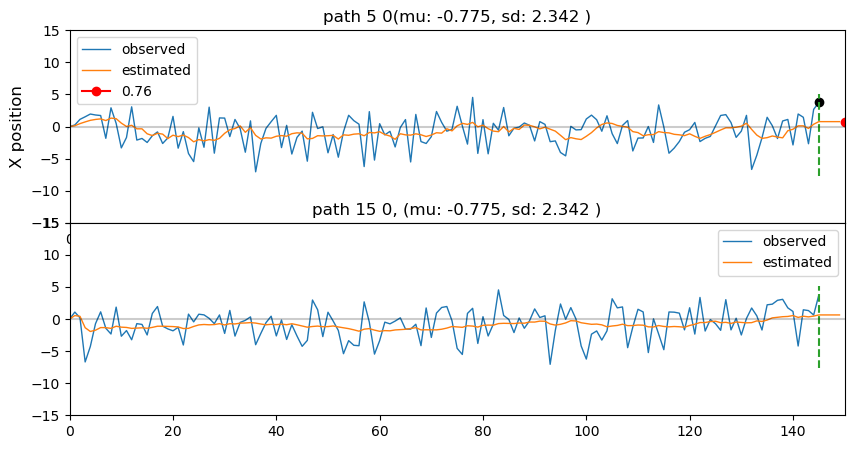

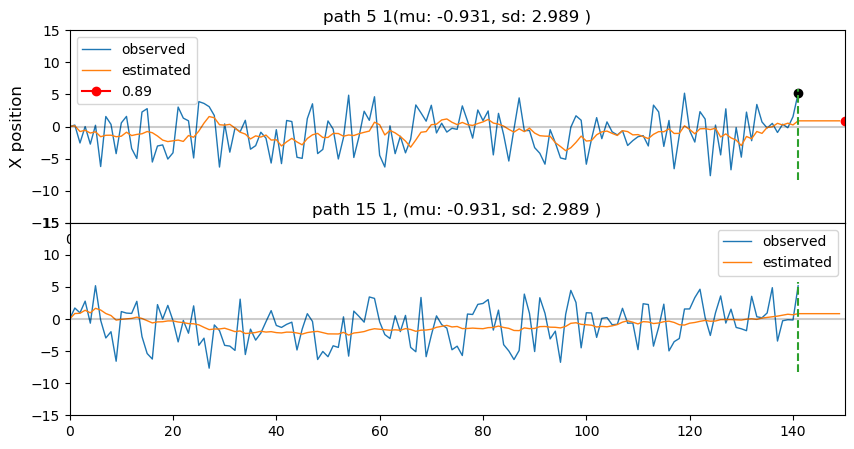

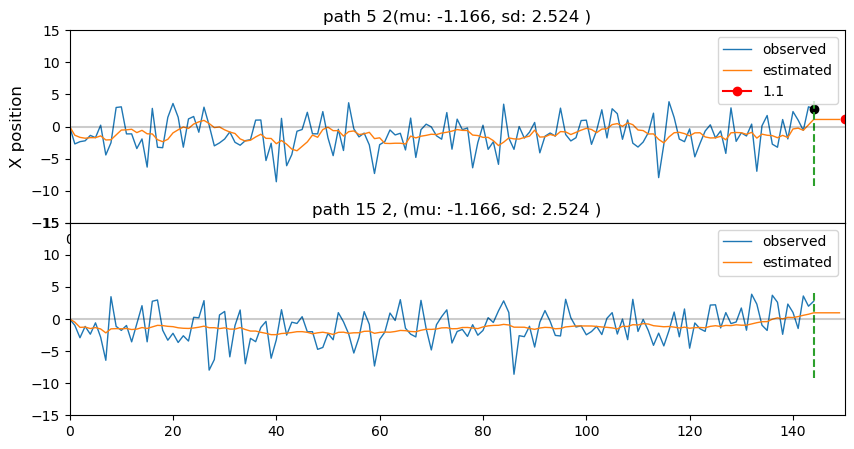

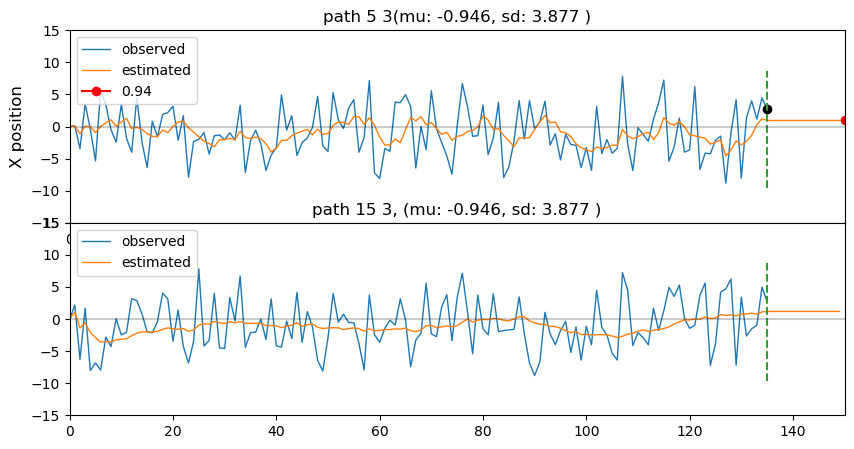

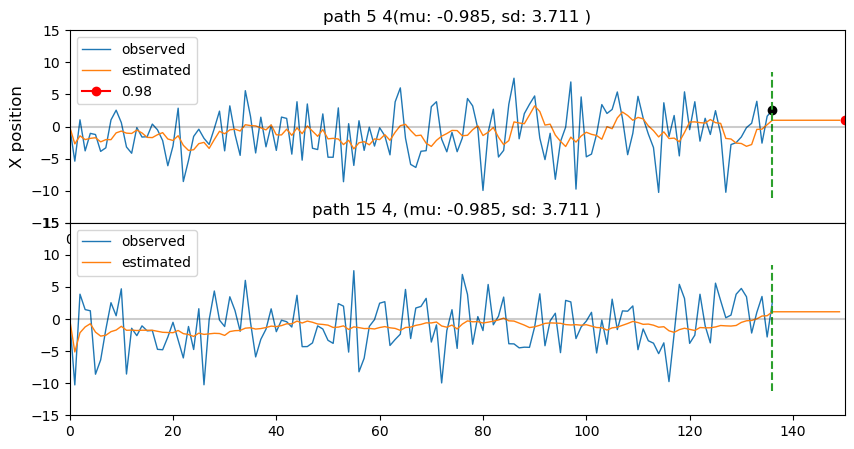

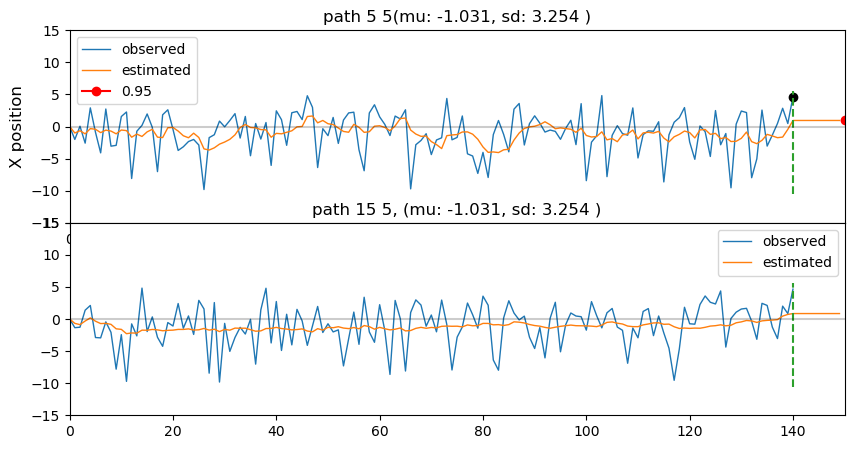

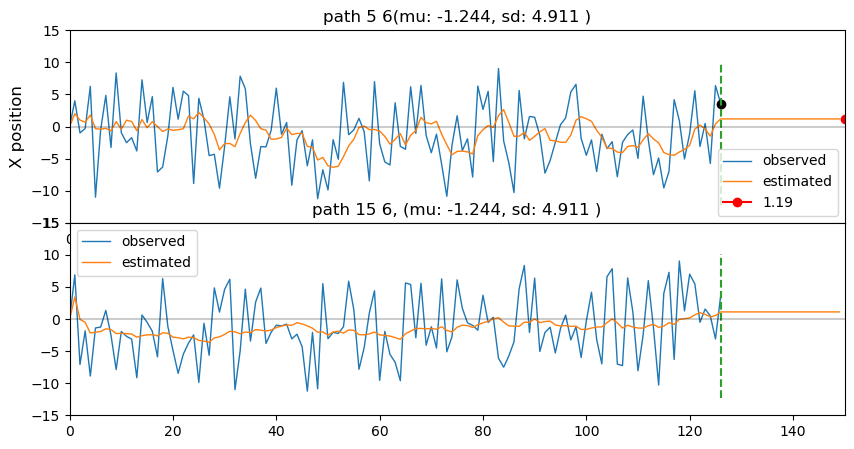

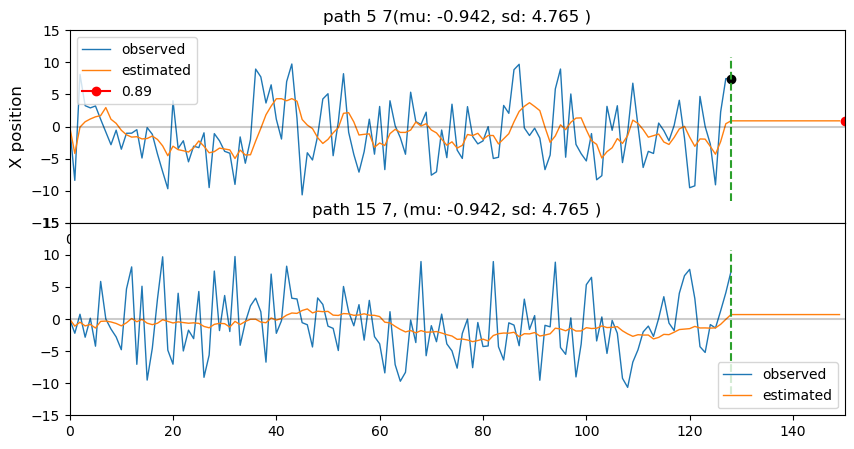

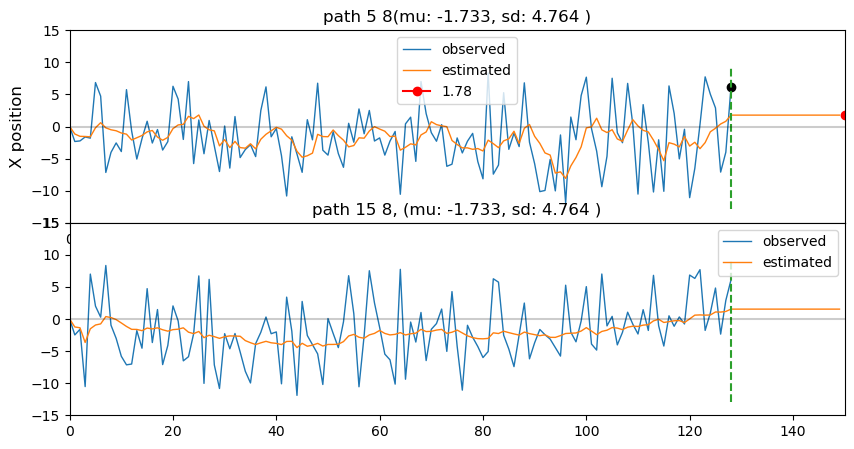

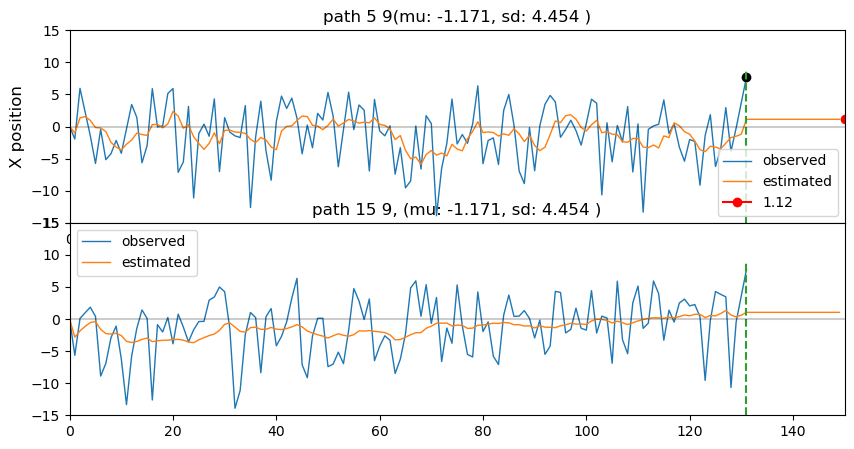

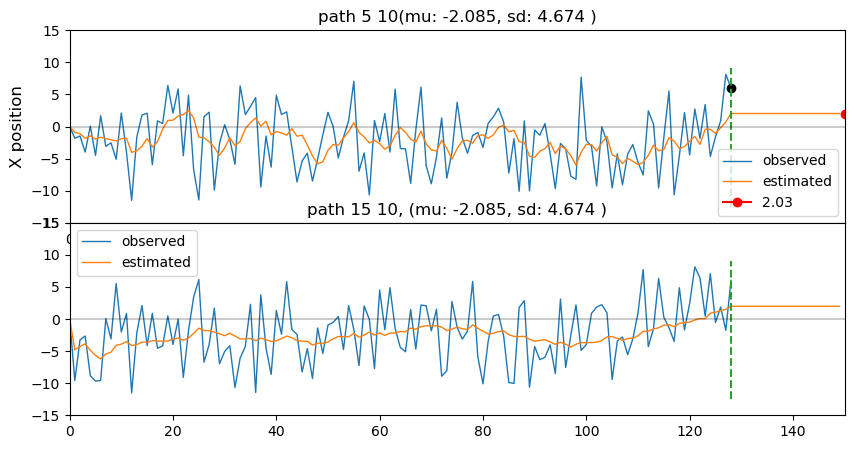

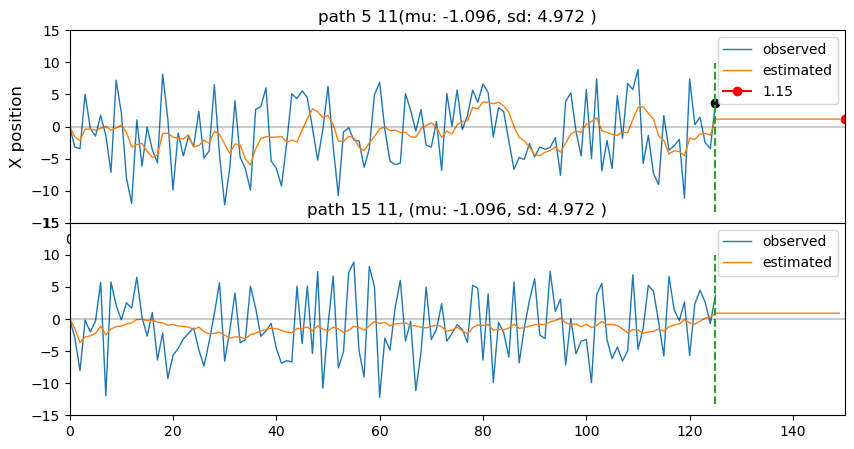

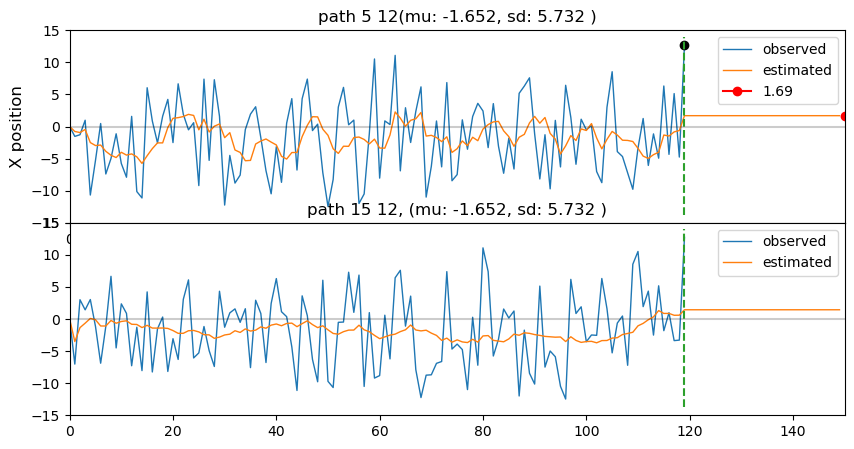

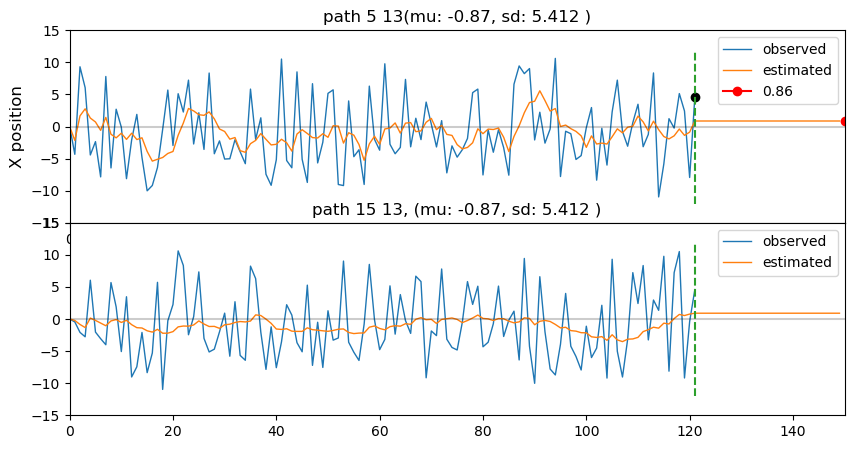

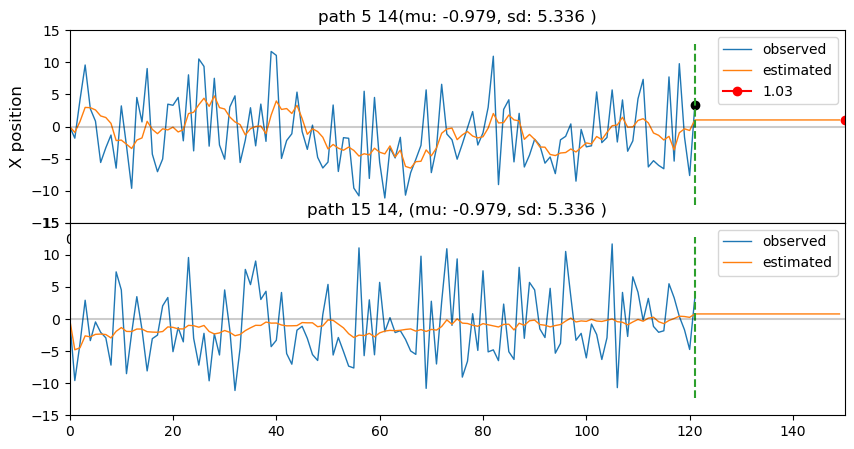

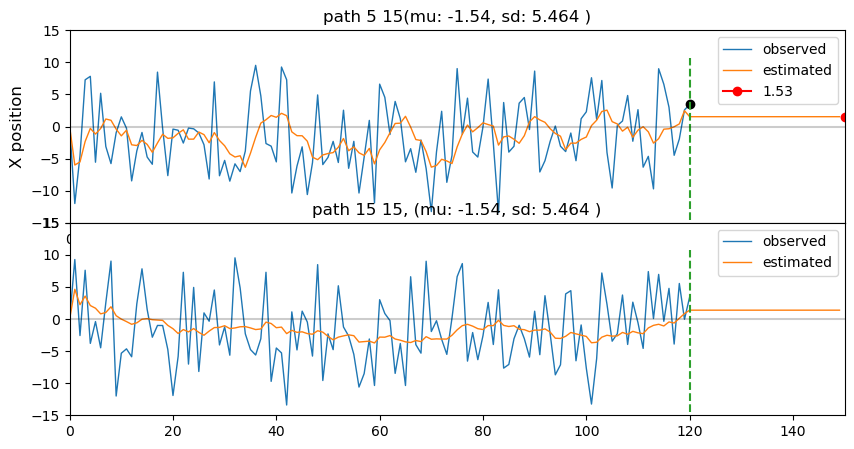

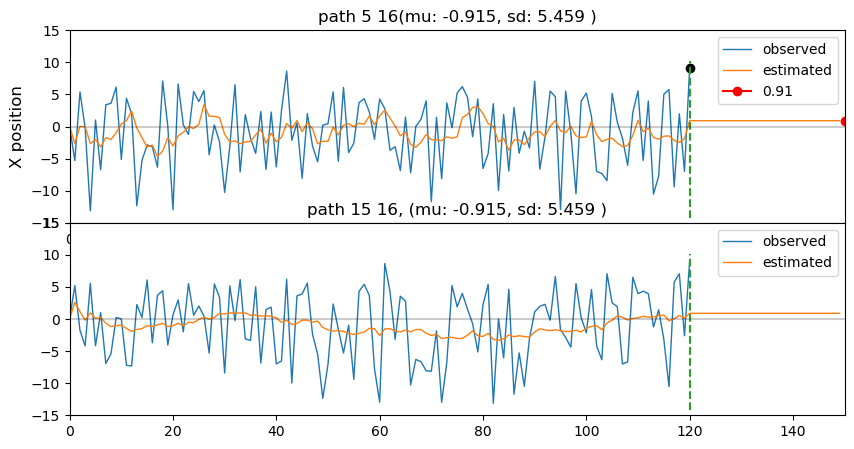

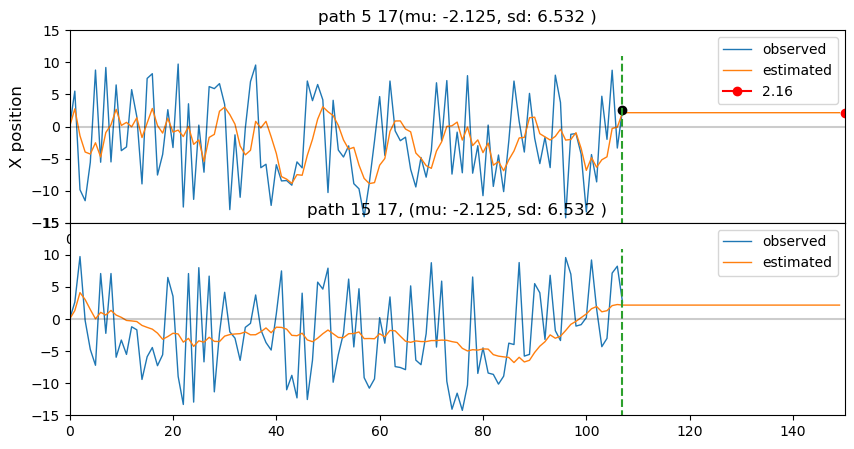

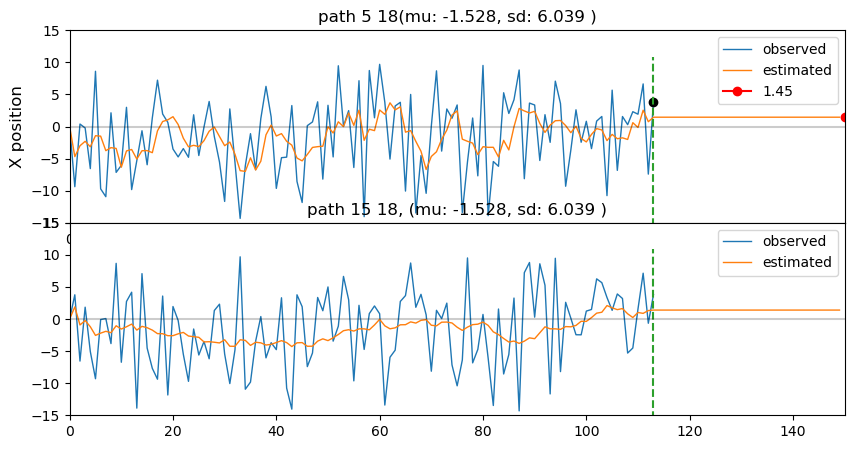

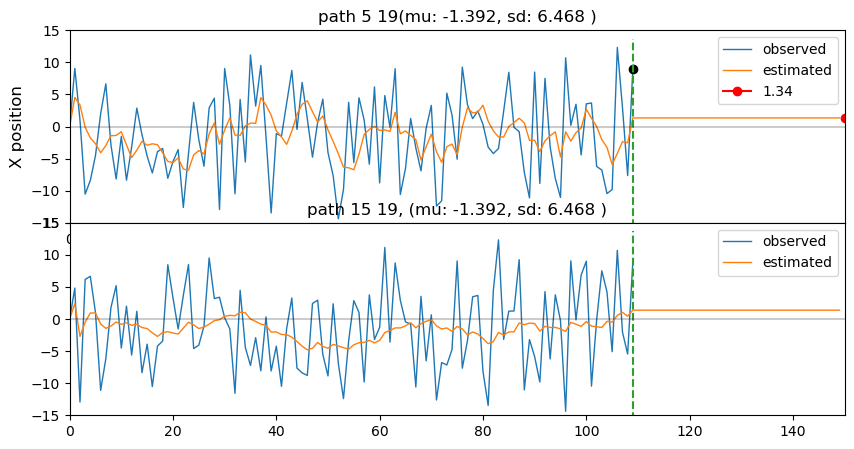

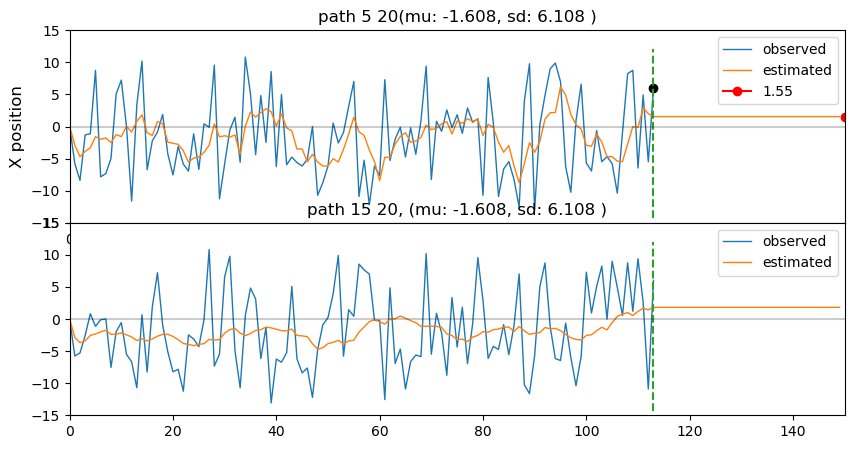

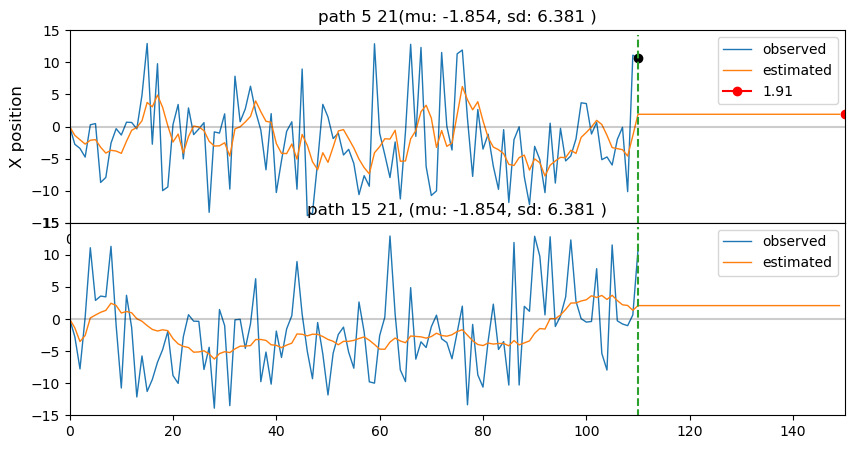

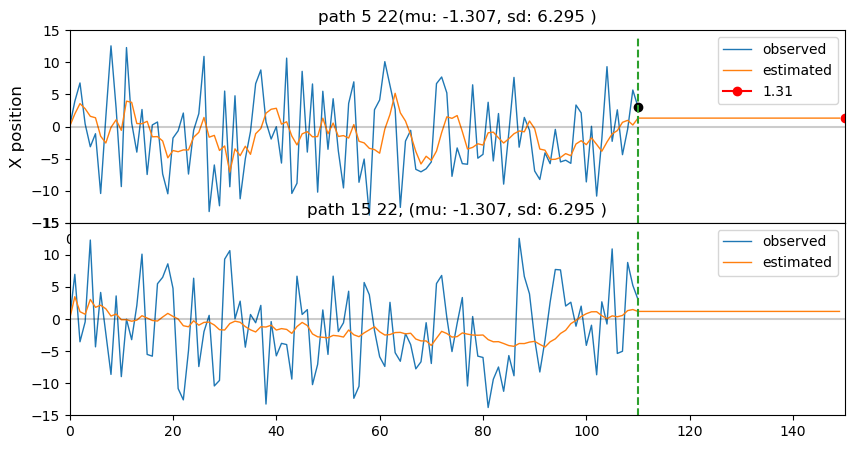

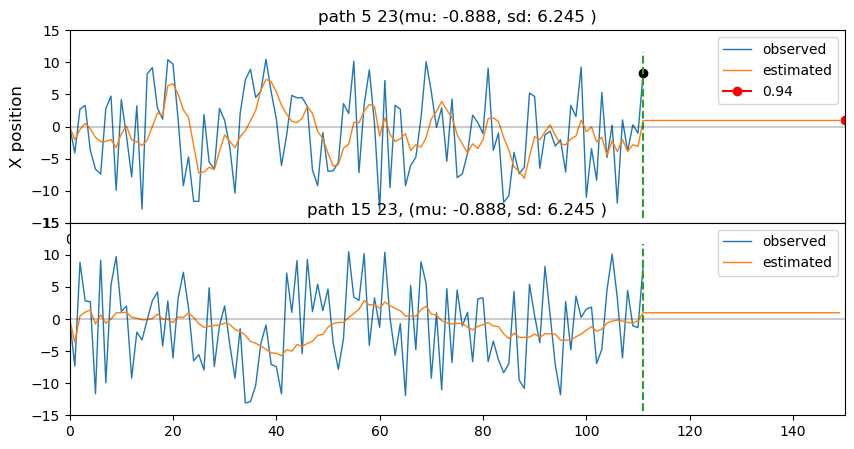

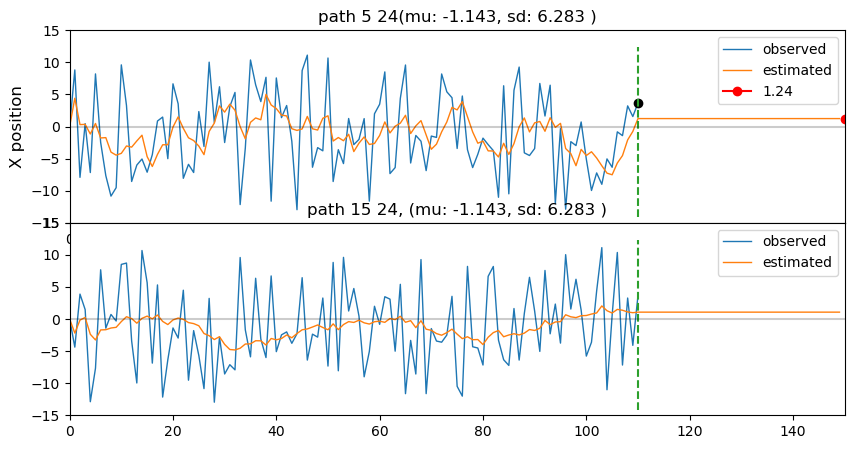

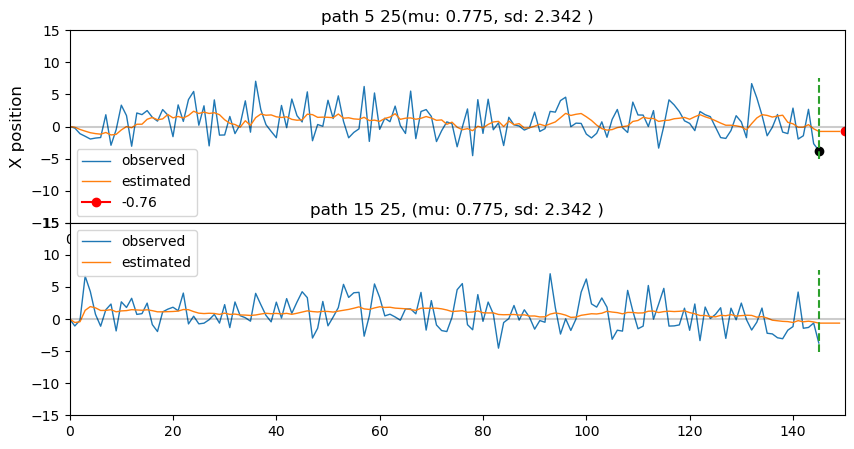

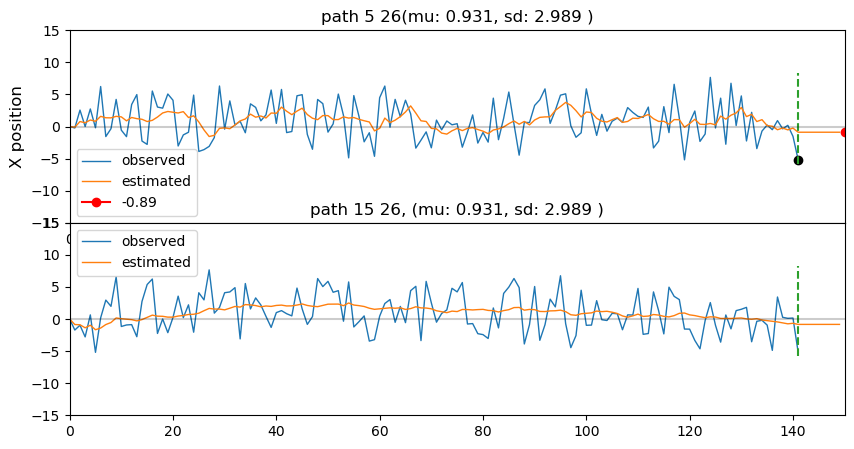

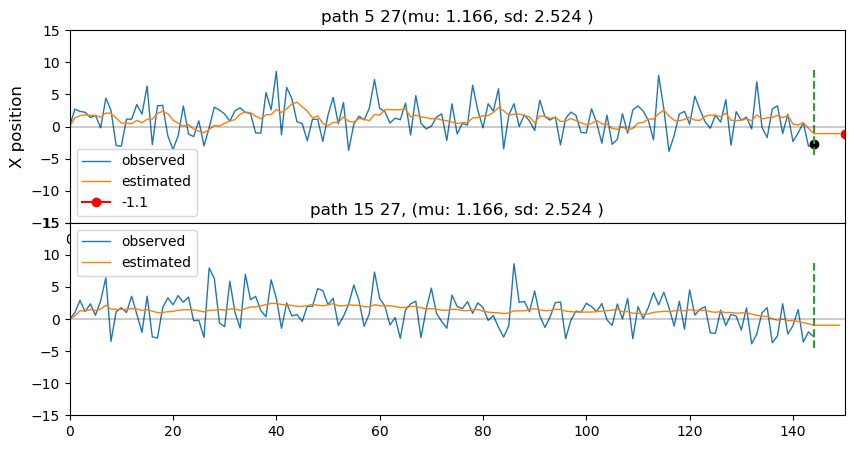

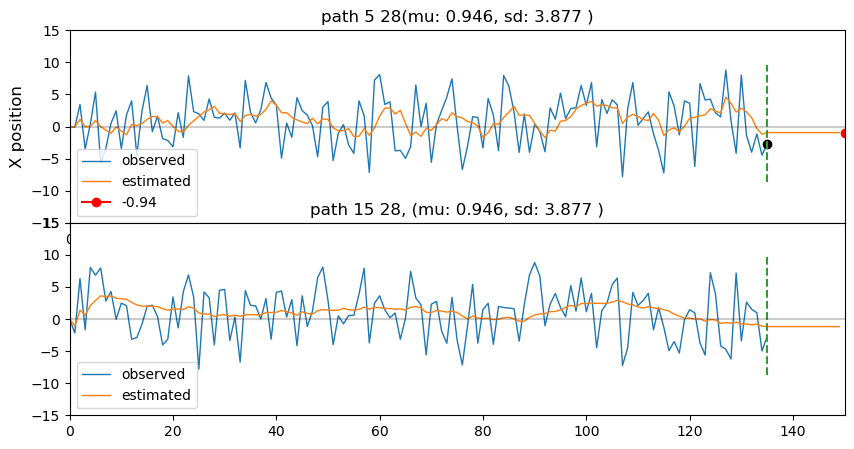

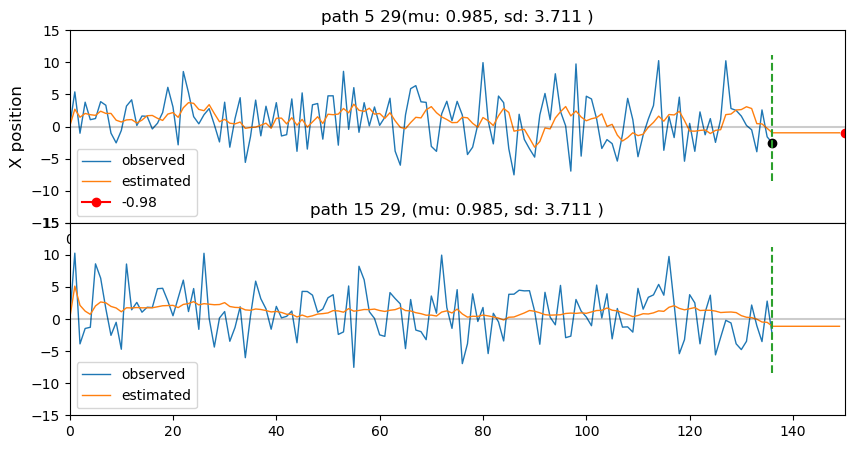

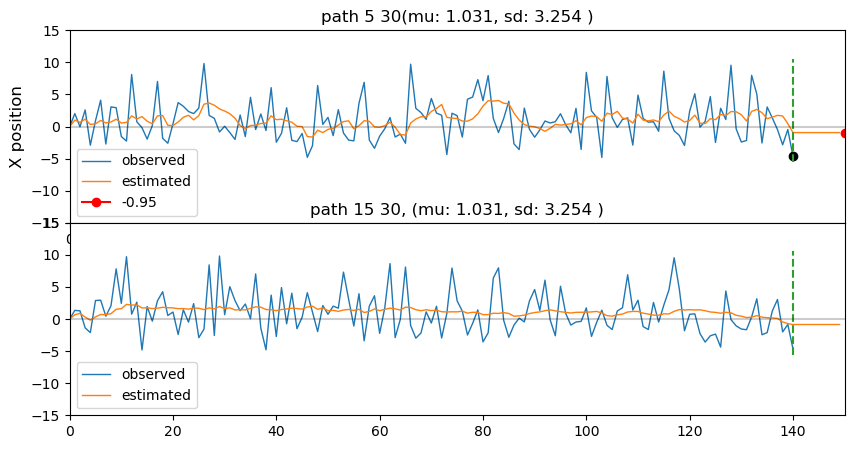

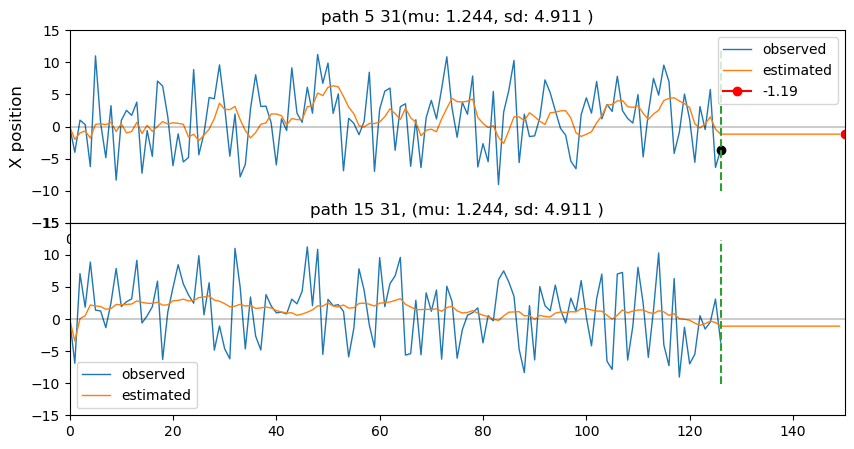

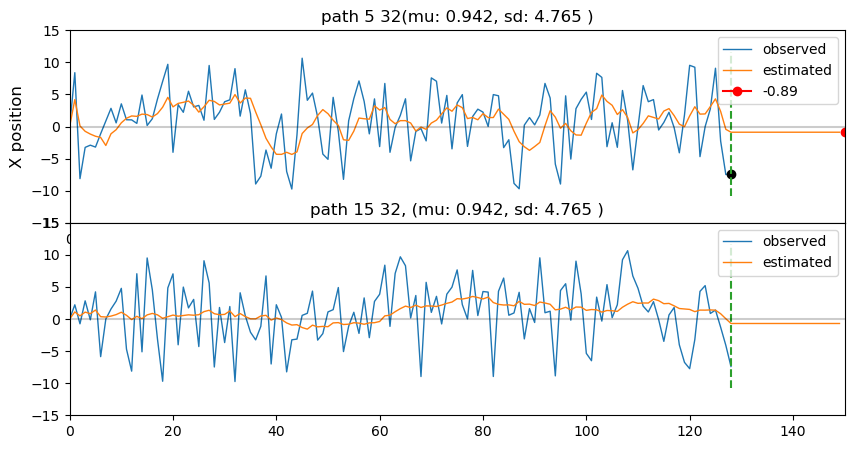

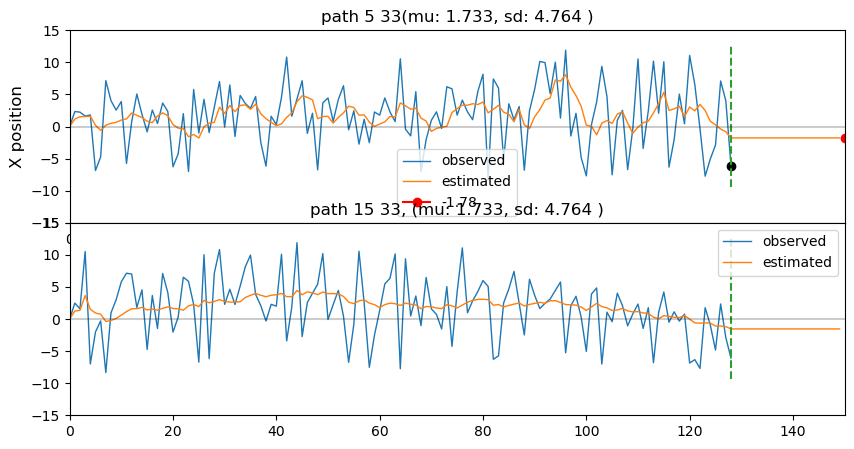

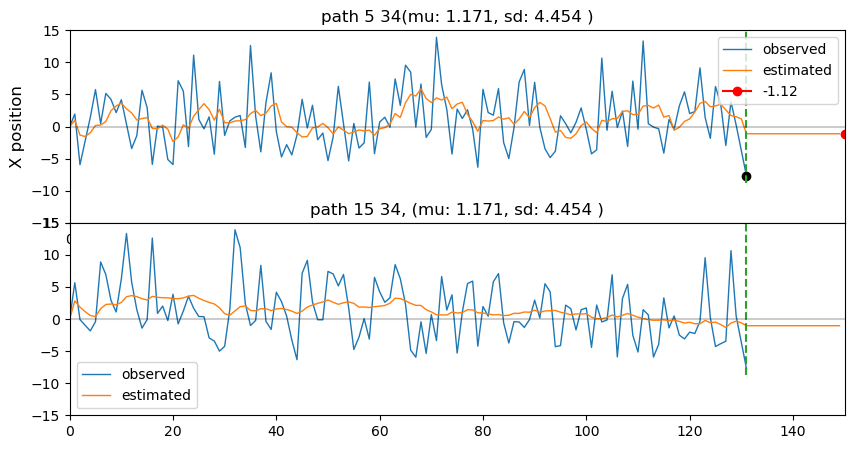

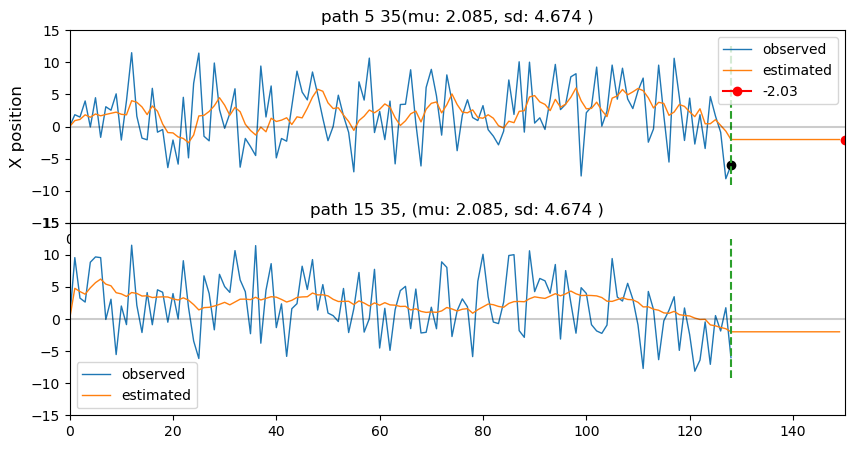

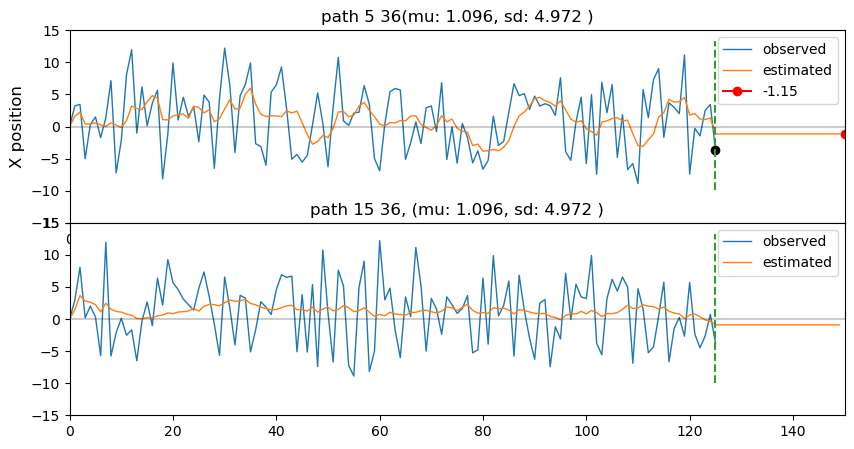

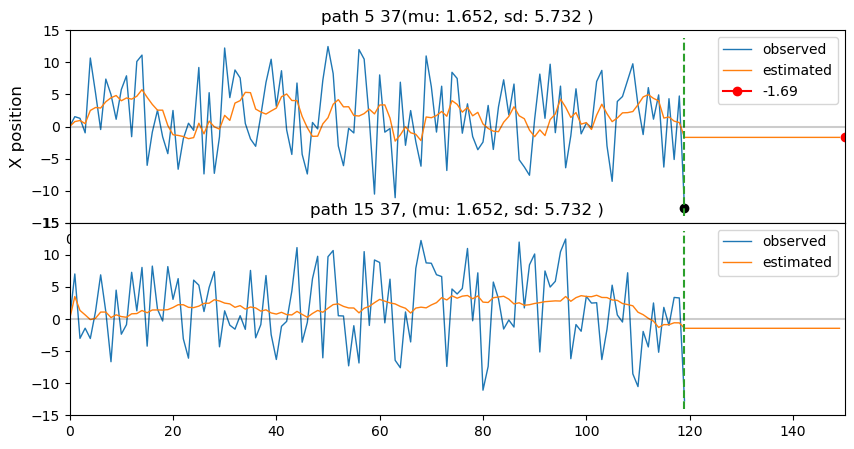

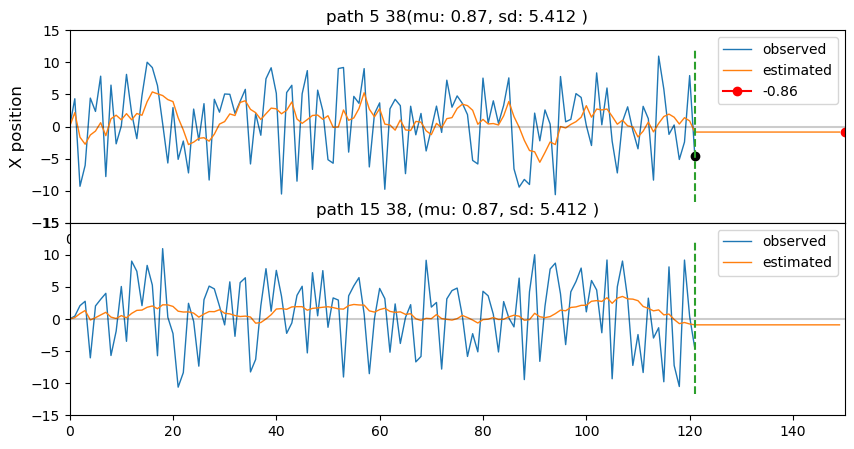

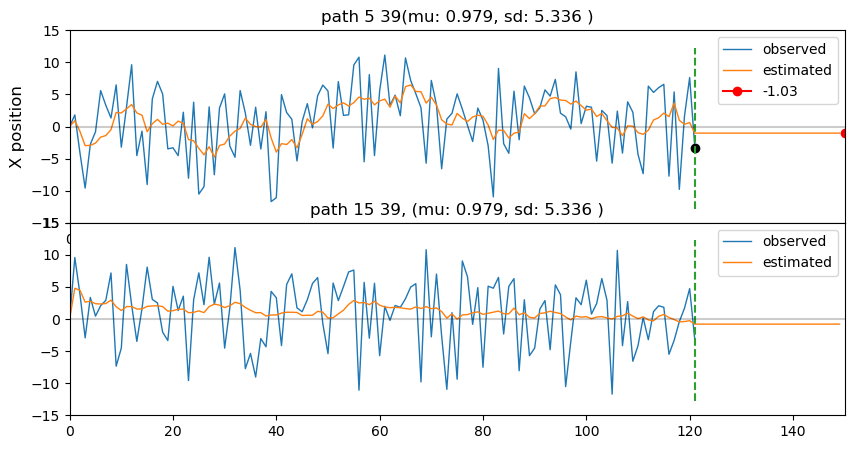

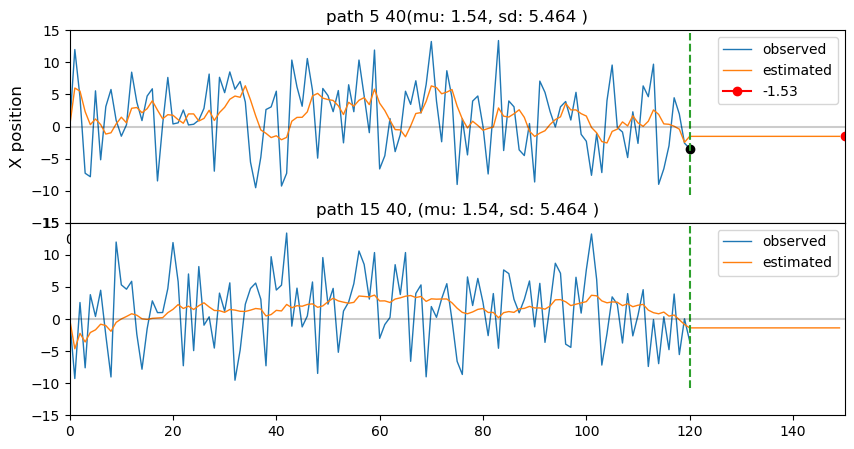

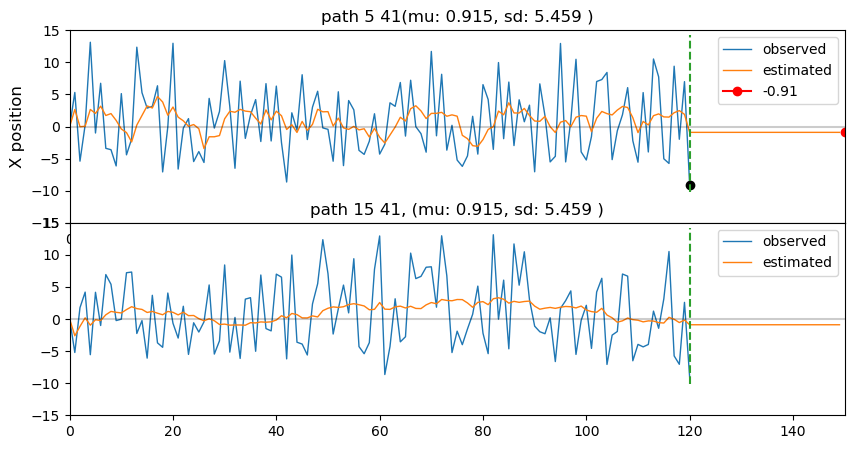

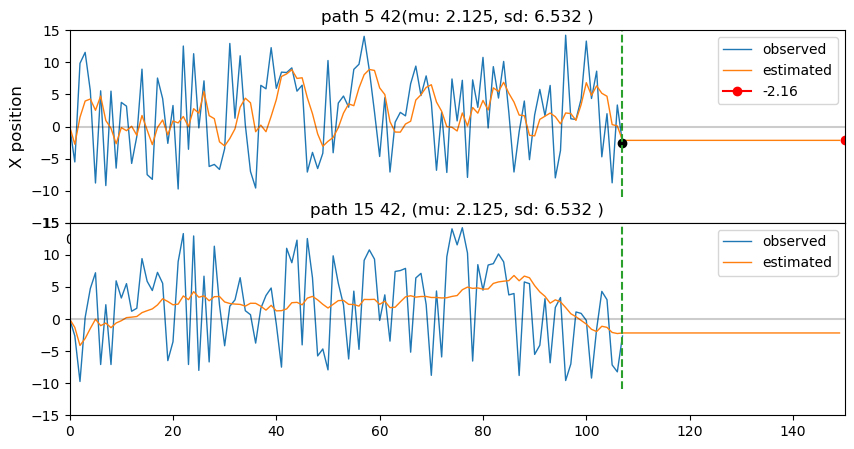

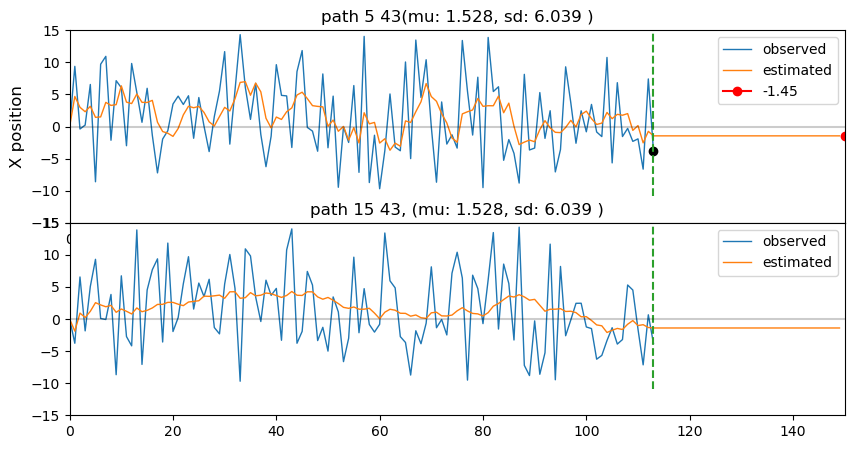

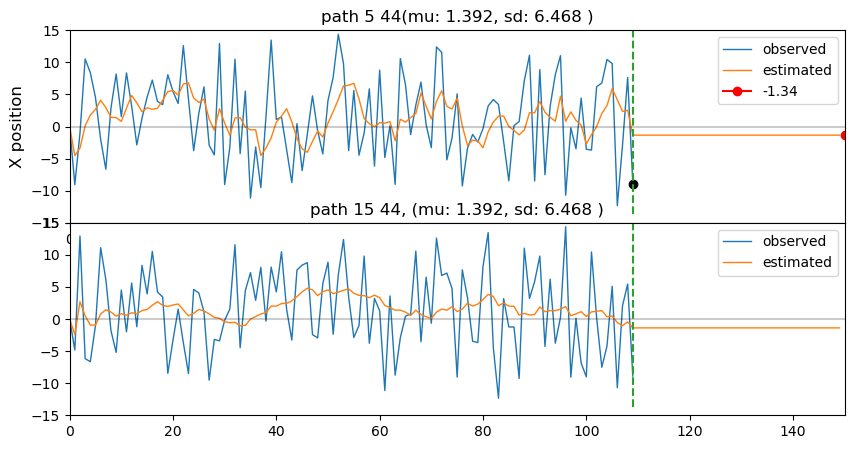

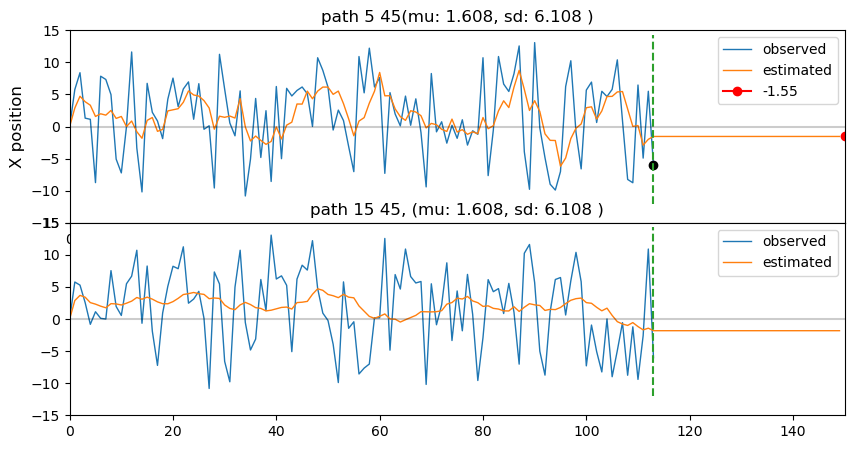

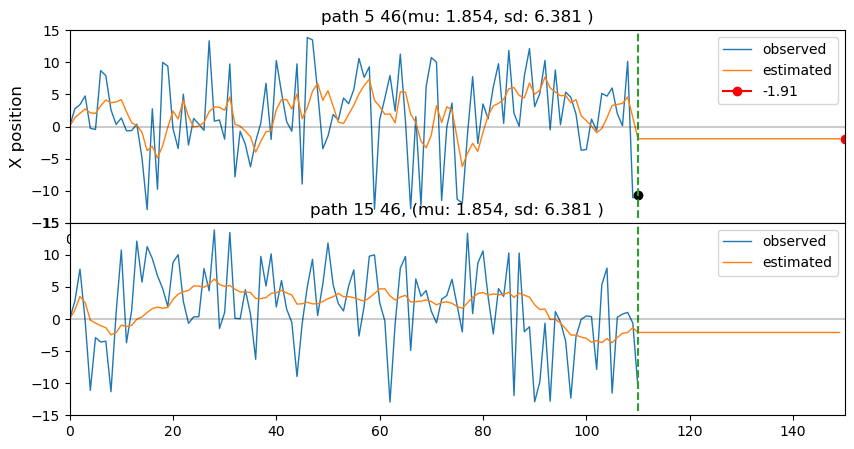

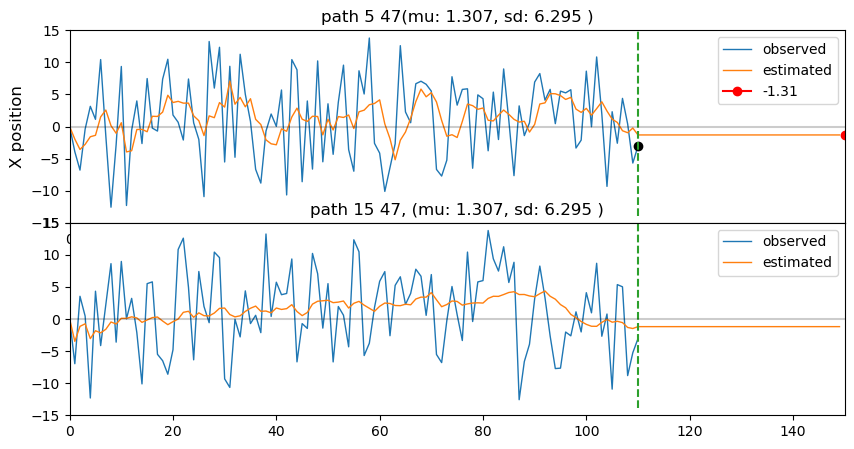

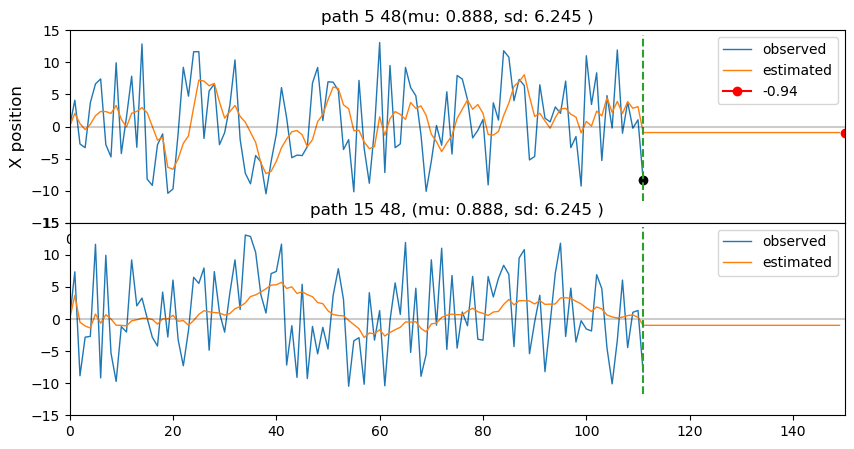

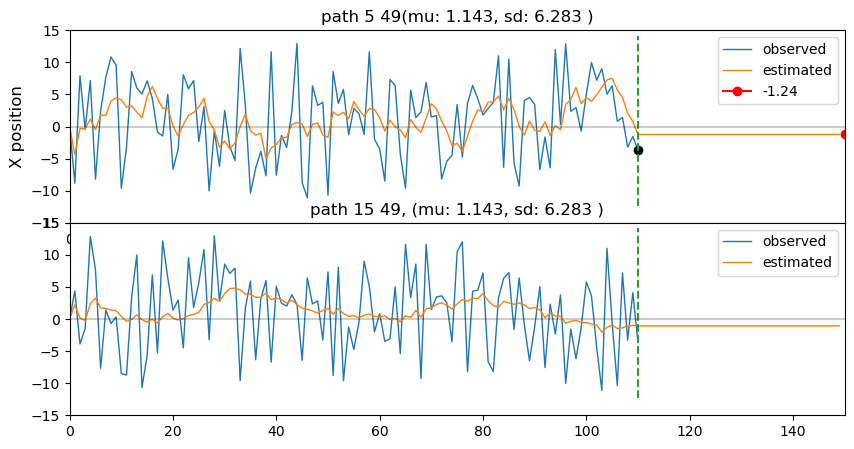

In [13]:
a,b =plotting (path_5,m_hat_5_w,path_15,m_hat_15_w)

In [ ]:
pred_5

In [ ]:
np.sum(label_5 == pred_5)/50

In [ ]:
label_5

In [ ]:
np.count_nonzero(np.isnan(m_hat_5_w[:, 1]))

In [ ]:
m_hat_5_w[:,1]

In [ ]:

m_hat_5_w, acc_5_w, m_hat_15_w, acc_15_w= fit_window_model(path_5, label_5, path_15, label_15)
print("Accuracy for 5% window:", acc_5)
print("Accuracy for 15% window:", acc_15)

In [ ]:
path_5[:,48]

In [ ]:
a,b =plotting (path_5,m_hat_5_w,path_15,m_hat_15_w)